# Setup

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [26]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

In [27]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
mnist.target = mnist.target.astype(np.uint8)==5

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(n_estimators=10, random_state=42)

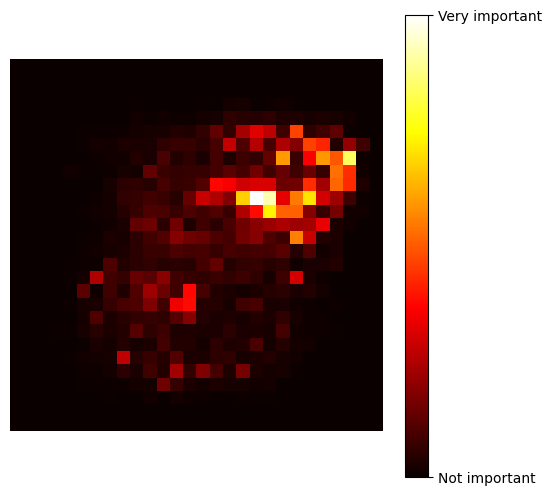

In [28]:
plt.figure(figsize = (6,6))

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

# Principle Component Analysis

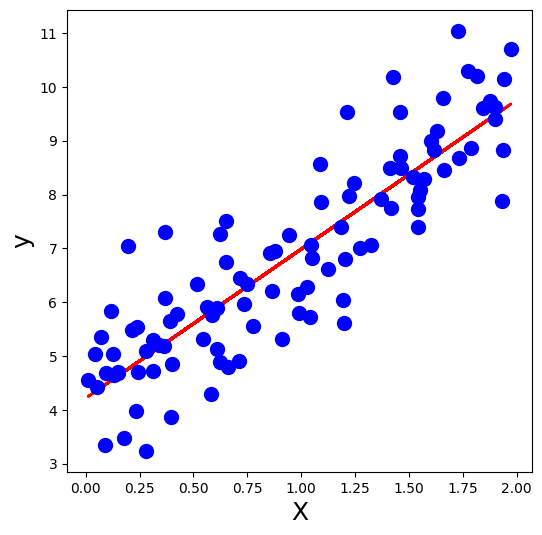

In [29]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)

plt.figure(figsize=(6,6))
plt.plot(X, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.", markersize = 20)
plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=18)

plt.show()

#### PCA for dimensionality reduction

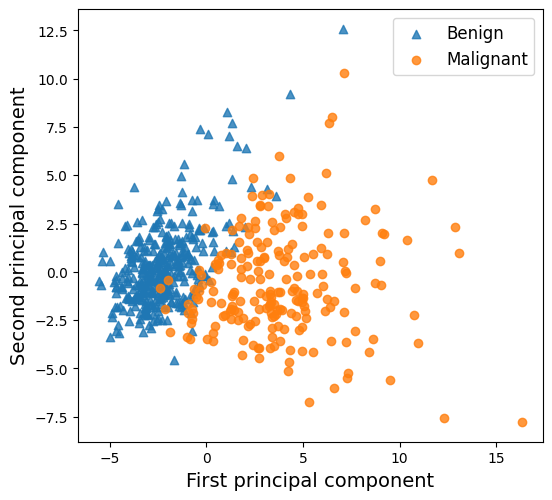

In [30]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(cancer.data)


plt.figure(figsize = (6,6))
plt.scatter(X_pca_scaled[cancer.target==1, 0], X_pca_scaled[cancer.target==1, 1],
            marker = '^', alpha=.8, label = 'Benign')
plt.scatter(X_pca_scaled[cancer.target==0, 0], X_pca_scaled[cancer.target==0, 1],
            marker = 'o', alpha=.8, label = 'Malignant')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component", fontsize = 14)
plt.ylabel("Second principal component", fontsize = 14)
plt.legend(loc='best', fontsize = 12)
plt.show()

<Figure size 640x480 with 0 Axes>

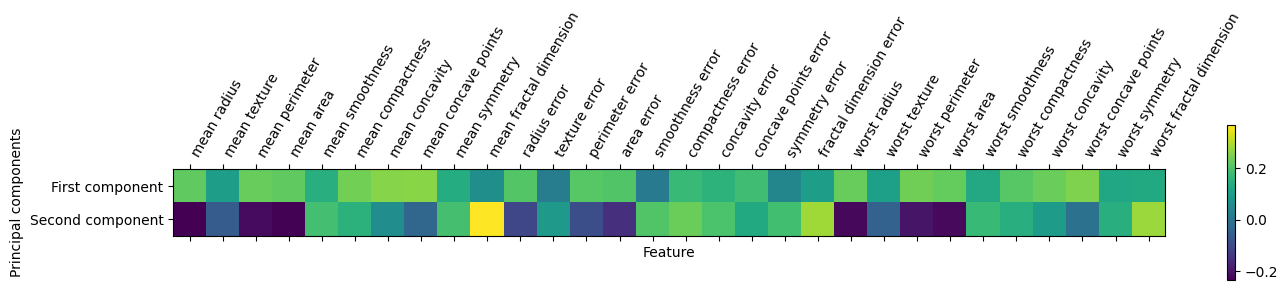

In [31]:
components = pca_scaled.named_steps['pca'].components_
plt.figure()
plt.matshow(components, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

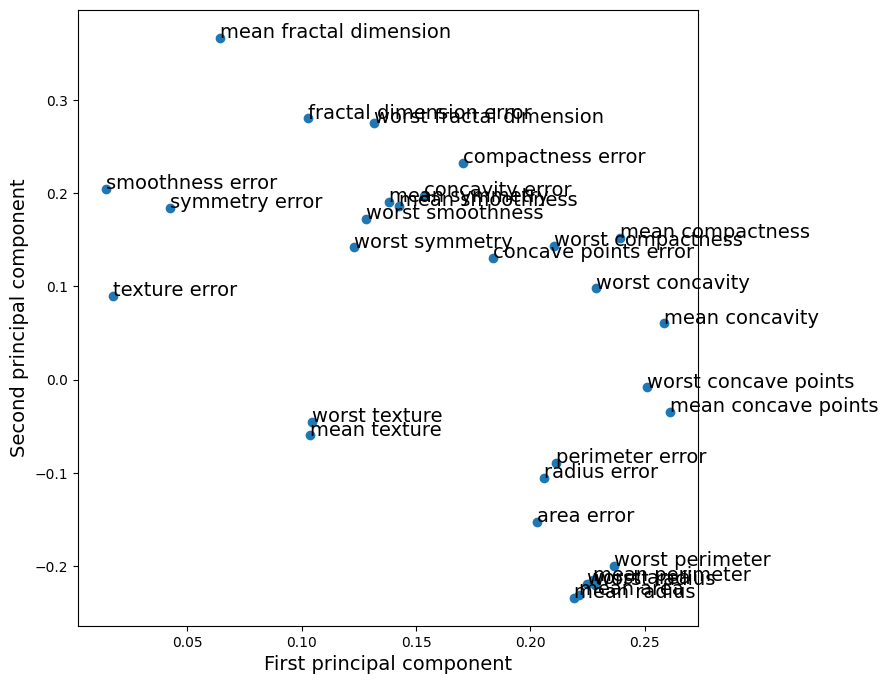

In [32]:
plt.figure(figsize=(8, 8))
plt.scatter(components[0], components[1])
for i, feature_contribution in enumerate(components.T):
    plt.annotate(cancer.feature_names[i], feature_contribution, fontsize = 14)
plt.xlabel("First principal component", fontsize = 14)
plt.ylabel("Second principal component", fontsize = 14)
plt.show()

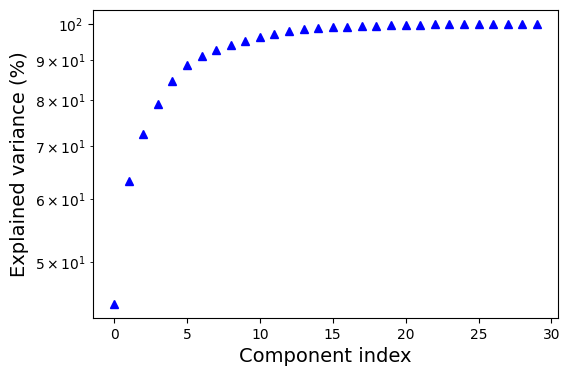

In [33]:
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(cancer.data)
pca = pca_scaled.named_steps['pca']

plt.figure(figsize=(6,4))
plt.semilogy(np.cumsum(pca.explained_variance_ratio_*100), 'b^')
plt.xlabel("Component index", fontsize = 14)
plt.ylabel("Explained variance (%)", fontsize = 14)
plt.show()

In [34]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

#### PCA for feature extraction

In [35]:
mnist.data.shape

(70000, 784)

In [36]:
X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
pca = PCA(n_components = .9)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [38]:
pca.explained_variance_ratio_, len(pca.explained_variance_ratio_)

(array([0.09749588, 0.07178768, 0.06162951, 0.05388209, 0.04901136,
        0.04306862, 0.0327903 , 0.0288084 , 0.0277186 , 0.02335592,
        0.02096563, 0.02041116, 0.0171673 , 0.01690933, 0.01586495,
        0.01481065, 0.01316857, 0.01275651, 0.01184744, 0.01147948,
        0.01069804, 0.01013753, 0.00955891, 0.00907766, 0.00882871,
        0.00838362, 0.00807626, 0.00785986, 0.00741105, 0.00686279,
        0.0066026 , 0.00645089, 0.00601024, 0.00583783, 0.00569409,
        0.00543906, 0.00503739, 0.00487554, 0.00479521, 0.00466305,
        0.0045493 , 0.0044466 , 0.00419592, 0.00396214, 0.00383675,
        0.00375724, 0.00361231, 0.00349145, 0.00336042, 0.00319529,
        0.00316217, 0.00309484, 0.00297099, 0.00284987, 0.00283228,
        0.00268843, 0.00267876, 0.00255989, 0.00253893, 0.00243738,
        0.00238764, 0.00237204, 0.00230156, 0.00220372, 0.00212335,
        0.00206386, 0.00201954, 0.00194767, 0.00190789, 0.00188777,
        0.00186342, 0.00179292, 0.00176979, 0.00

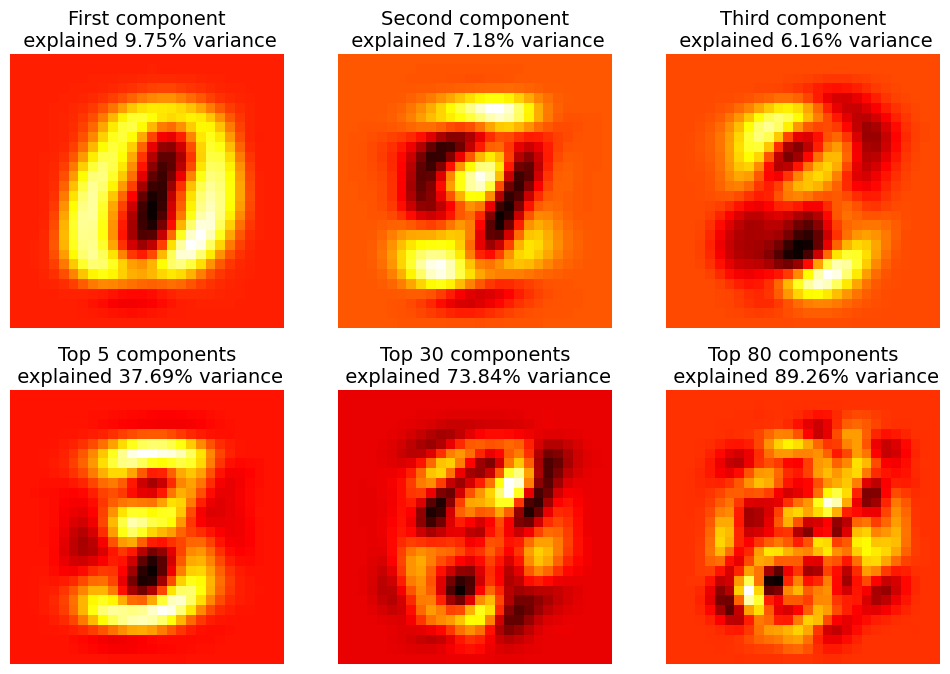

In [39]:
plt.figure(figsize= (12,8))

for subplot, title, component in zip((231, 232, 233, 234, 235, 236 ),
                                     ['First component\n explained %.2f%% variance' % (pca.explained_variance_ratio_*100)[0] ,
                                      'Second component\n explained %.2f%% variance'% (pca.explained_variance_ratio_*100)[1],
                                      'Third component\n explained %.2f%% variance' % (pca.explained_variance_ratio_*100)[2],
                                      'Top 5 components\n explained %.2f%% variance'% np.cumsum(pca.explained_variance_ratio_*100)[5],
                                      'Top 30 components\n explained %.2f%% variance'% np.cumsum(pca.explained_variance_ratio_*100)[30],
                                      'Top 80 components\n explained %.2f%% variance'% np.cumsum(pca.explained_variance_ratio_*100)[80]],
                                     (pca.components_[0], pca.components_[1], pca.components_[2],
                                      sum(pca.components_[:5]), sum(pca.components_[:30]), sum(pca.components_[:80]))):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plot_digit(component)

#### PCA for compression

In [40]:
def plot_digits(instances, images_per_row=5, **options):
    instances = np.array(instances)
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [41]:
index_5_train = []
for i, instance_label in enumerate(y_train):
    if instance_label == True:
        index_5_train.append(i)
        if len(index_5_train)==25:
            break

Text(0.5, 1.0, 'Compressed digits')

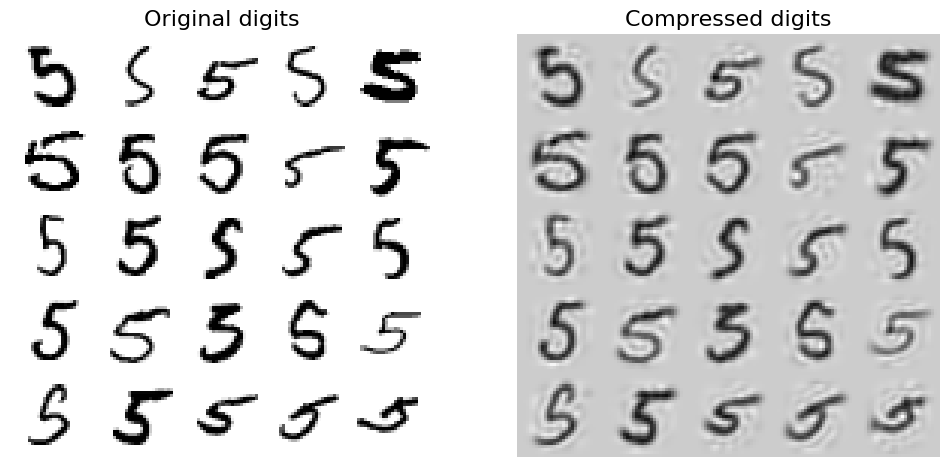

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_digits(X_train.iloc[index_5_train])
plt.title("Original digits", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[index_5_train])
plt.title("Compressed digits", fontsize=16)

#### PCA serve as regularization

In [43]:
# class distribution is slightly imbalanced
print(np.bincount(cancer.target))

[212 357]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=0)
# What does it mean if set a very high C hyperparameter?
lr = make_pipeline(StandardScaler(), LogisticRegression(C=10000, class_weight='balanced'))
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

1.0
0.9370629370629371


In [45]:
pca_lr = make_pipeline(StandardScaler(),
                       PCA(n_components=2),
                       LogisticRegression(C=10000, class_weight='balanced'))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.9577464788732394
0.9090909090909091


Select appropriate hyperparameter value for PCA. `n_components` can be interger and also float.

In [46]:
pca_lr = make_pipeline(StandardScaler(),
                       PCA(n_components=6),
                       LogisticRegression(C=10000, class_weight='balanced'))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.9812206572769953
0.951048951048951


In [47]:
pca_lr = make_pipeline(StandardScaler(),
                       PCA(n_components=.90),
                       LogisticRegression(C=10000, class_weight='balanced'))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.9812206572769953
0.951048951048951


### Incremental PCA

In [48]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [49]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=155)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced_incpca = inc_pca.transform(X_train)

In [50]:
pca = PCA(n_components = 155)
X_reduced_pca = pca.fit_transform(X_train)

In [51]:
print(np.allclose(pca.mean_, inc_pca.mean_))
print(np.allclose(X_reduced_pca, X_reduced_incpca))

True
False


##### Using `memmap`

In [52]:
# create memmap instance: create an empty file on dish that acts like a numpy array
filename = "my_minst.mmap"
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
# copy all training instances into memory-mapped file
# if memory is limited, could copy the data in chunks with a loop instead
X_mmap[:] = X_train
# ensure changes are written to disk
X_mmap.flush()

In [53]:
# reopen the file in 'readonly' mode to conserve memory
# allow read the data from disk without loading it all into RAM.
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=155, batch_size=batch_size)
inc_pca.fit(X_mmap)


IncrementalPCA(batch_size=600, n_components=155)

#### Kernel PCA

In [54]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [55]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04,
                   fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

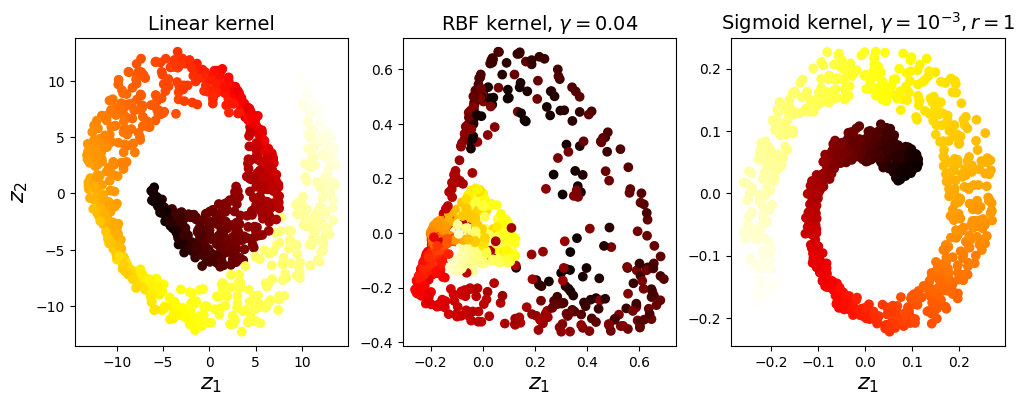

In [56]:
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

plt.figure(figsize=(12, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"),
                            (132, rbf_pca, "RBF kernel, $\gamma=0.04$"),
                            (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)

    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=16)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=16)

plt.show()

# t-SNE Manifold Learning

In [57]:
from sklearn.datasets import load_digits
digits = load_digits()

In [58]:
# pca
pca = PCA(n_components=2)
digits_pca = pca.fit_transform(digits.data)

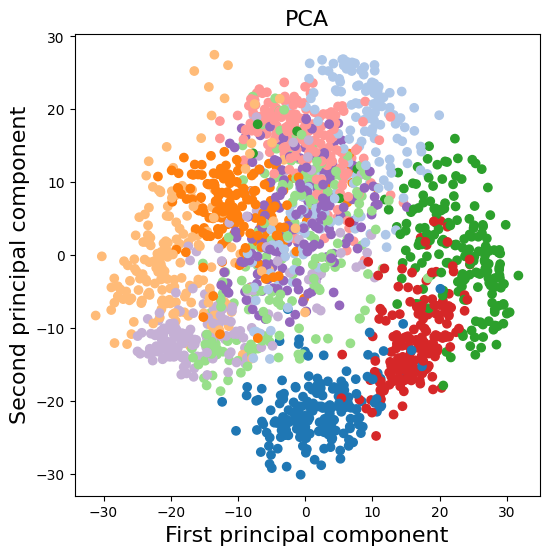

In [59]:
plt.figure(figsize=(6,6))
plt.scatter(digits_pca[:, 0], digits_pca[:, 1], c=plt.cm.tab20(digits.target))
plt.title("PCA", fontsize = 16)
plt.xlabel("First principal component", fontsize = 16)
plt.ylabel("Second principal component", fontsize = 16)
plt.show()

In [60]:
from sklearn.manifold import TSNE
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

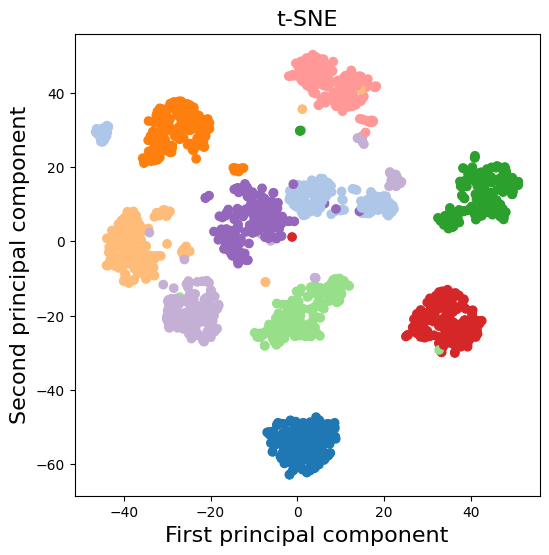

In [61]:
plt.figure(figsize=(6,6))
plt.scatter(digits_tsne[:, 0], digits_tsne[:, 1], c=plt.cm.tab20(digits.target))
plt.title("t-SNE", fontsize = 16)
plt.xlabel("First principal component", fontsize = 16)
plt.ylabel("Second principal component", fontsize = 16)
plt.show()

hyperparameter for t-SNE

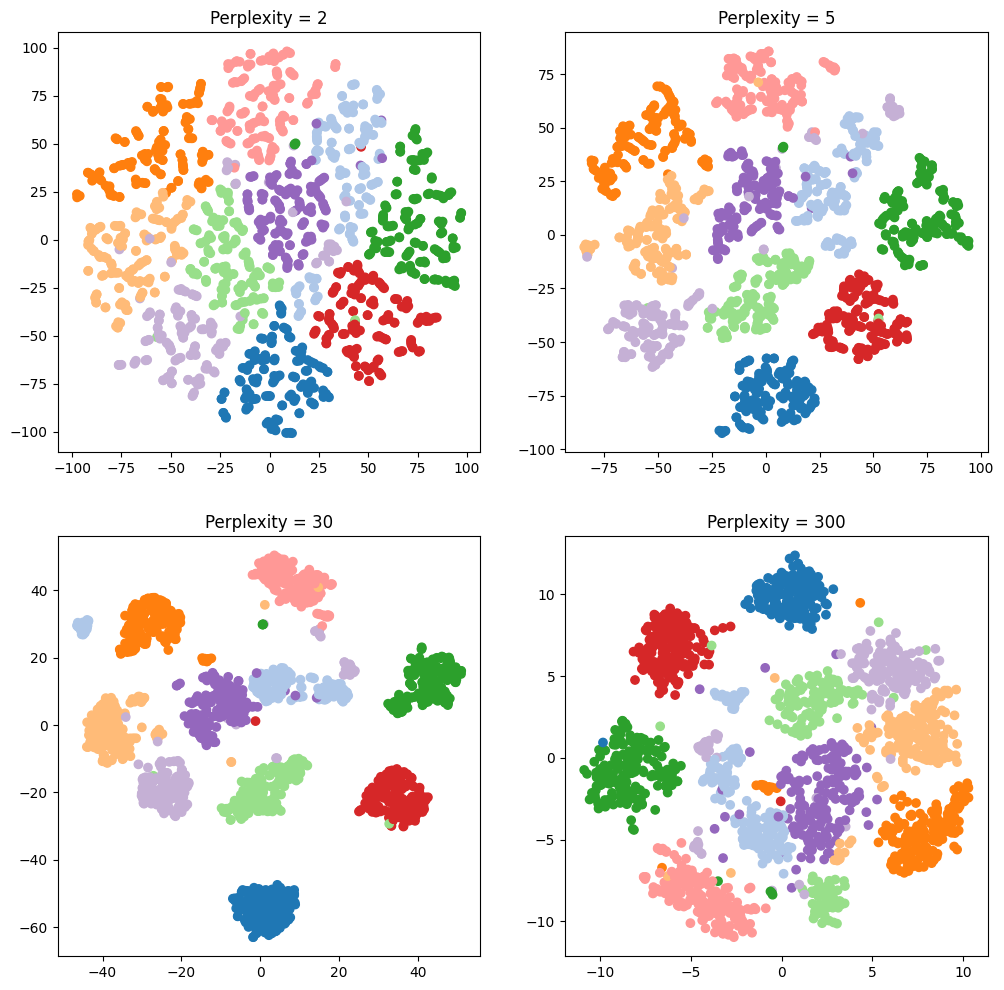

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, perplexity in enumerate([2, 5, 30, 300]):
    plt.sca(axes[i // 2, i % 2])
    digits_tsne = TSNE(n_components=2,perplexity=perplexity, random_state=42).fit_transform(digits.data)
    plt.scatter(digits_tsne[:, 0], digits_tsne[:, 1], c=plt.cm.tab20(digits.target))
    plt.title("Perplexity = {}".format(perplexity))

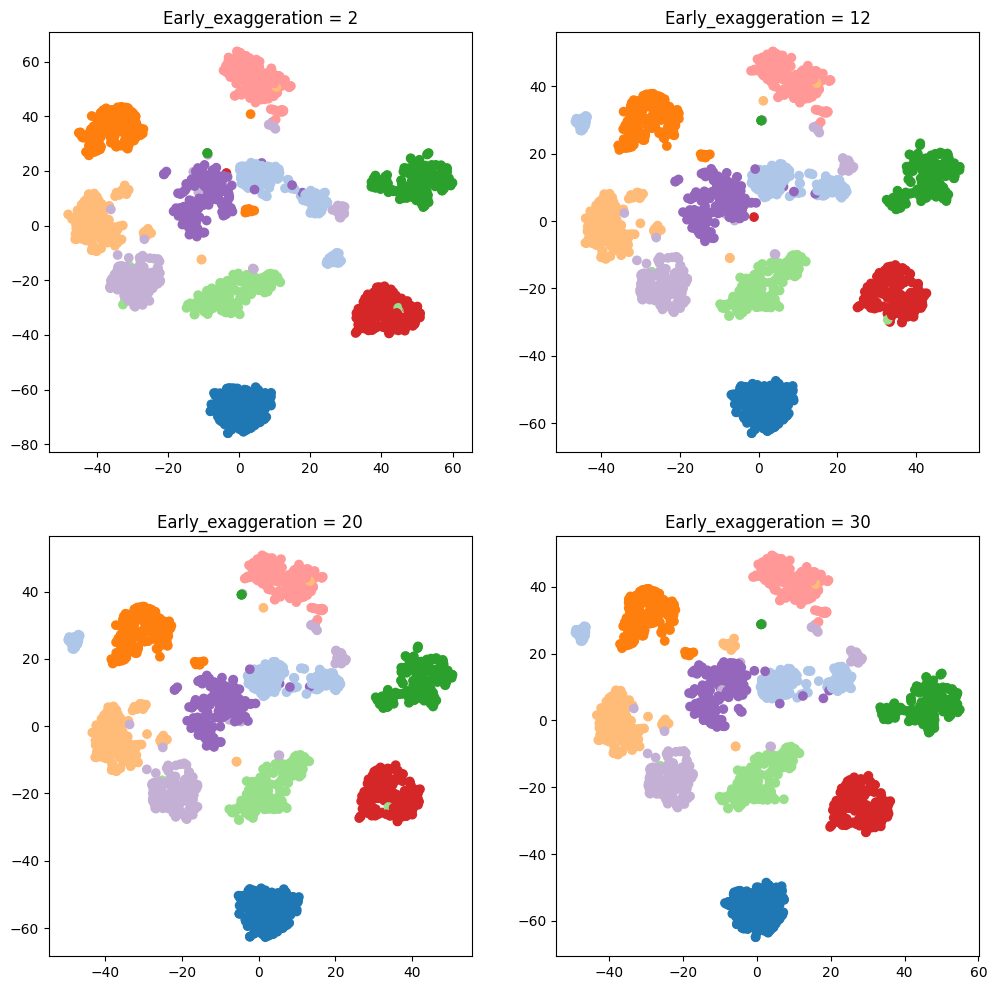

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, early_exaggeration in enumerate([2, 12, 20, 30]):
    plt.sca(axes[i // 2, i % 2])
    digits_tsne = TSNE(n_components=2,perplexity=30,
                       early_exaggeration=early_exaggeration, random_state=42).fit_transform(digits.data)
    plt.scatter(digits_tsne[:, 0], digits_tsne[:, 1], c=plt.cm.tab20(digits.target))
    plt.title("Early_exaggeration = {}".format(early_exaggeration))

In [64]:
# cancer data
tsne_scaled = make_pipeline(StandardScaler(), TSNE(random_state=42))
cancer_tsne_scaled = tsne_scaled.fit_transform(cancer.data)

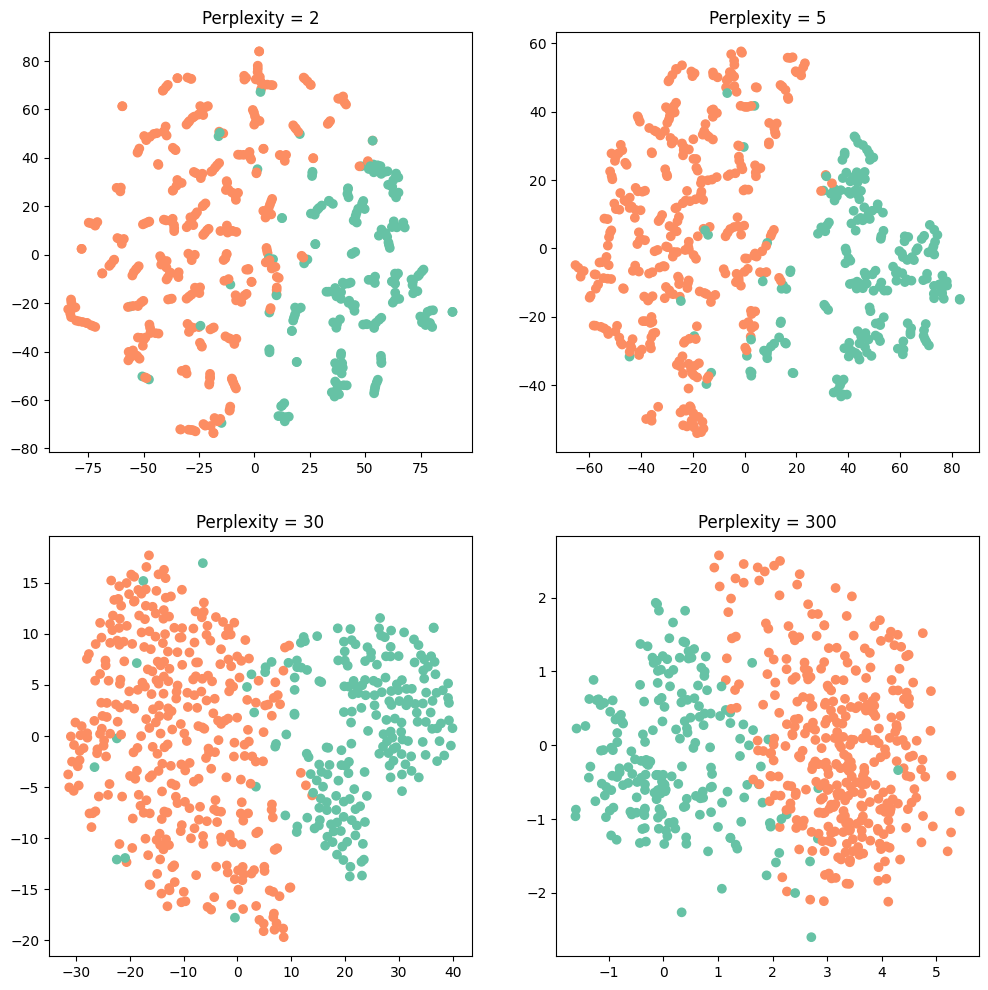

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, perplexity in enumerate([2, 5, 30, 300]):
    plt.sca(axes[i // 2, i % 2])
    tsne_scaled = make_pipeline(StandardScaler(), TSNE(perplexity=perplexity, random_state=42))
    cancer_tsne_scaled = tsne_scaled.fit_transform(cancer.data)
    plt.scatter(cancer_tsne_scaled[:, 0], cancer_tsne_scaled[:, 1], c=plt.cm.Set2(cancer.target))
    plt.title("Perplexity = {}".format(perplexity))

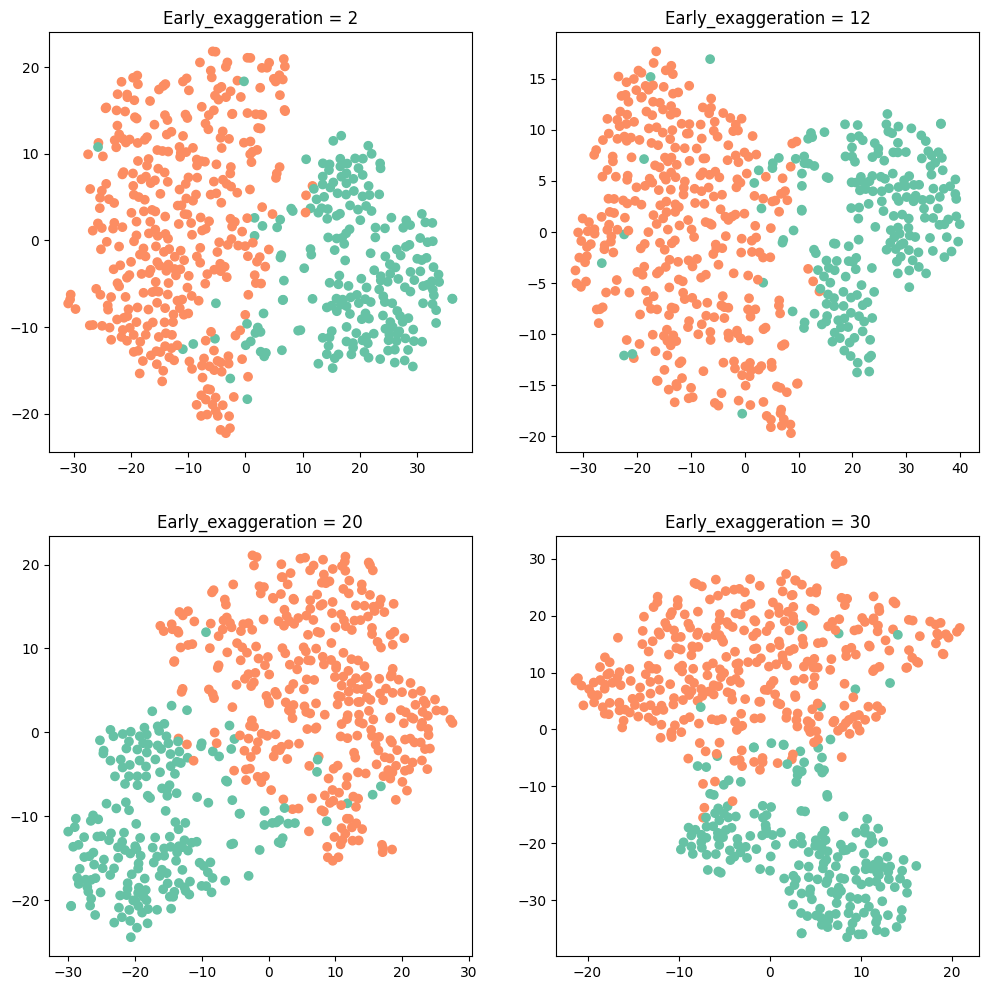

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, early_exaggeration in enumerate([2, 12, 20, 30]):
    plt.sca(axes[i // 2, i % 2])
    tsne_scaled = make_pipeline(StandardScaler(), TSNE(perplexity=30,
                                                       early_exaggeration=early_exaggeration, random_state=42))
    cancer_tsne_scaled = tsne_scaled.fit_transform(cancer.data)
    plt.scatter(cancer_tsne_scaled[:, 0], cancer_tsne_scaled[:, 1], c=plt.cm.Set2(cancer.target))
    plt.title("Early_exaggeration = {}".format(early_exaggeration))

# Clustering

In [66]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

In [67]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

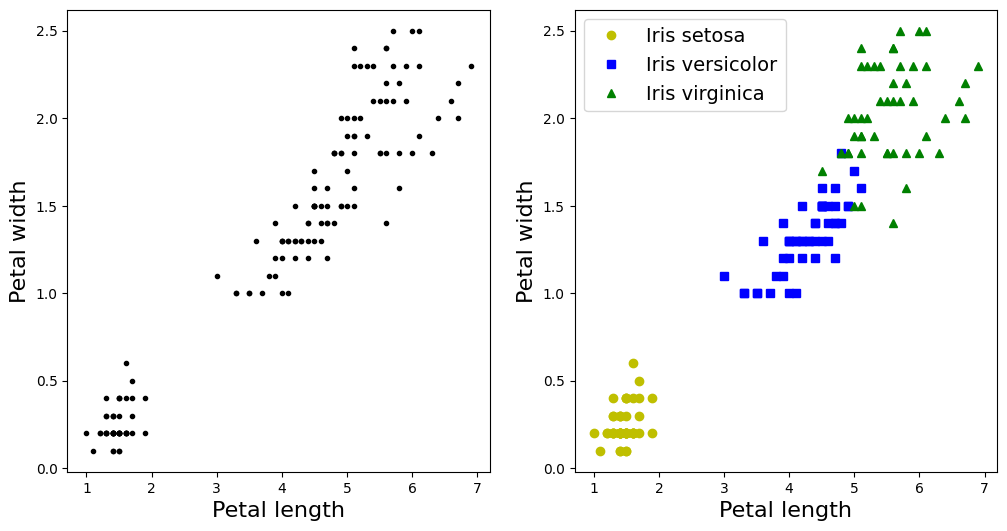

In [68]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=16)
plt.ylabel("Petal width", fontsize=16)

plt.subplot(122)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=16)
plt.ylabel("Petal width", fontsize=16)
plt.legend(fontsize=14)

plt.show()

## K-means

In [69]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [70]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("X1", fontsize=16)
    plt.ylabel("X2", fontsize=16)

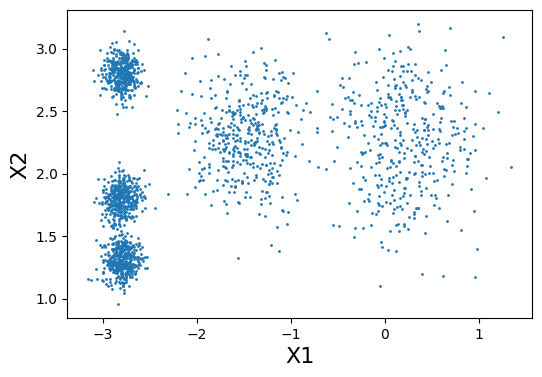

In [71]:
plt.figure(figsize=(6,4))
plot_clusters(X)
plt.show()

Using `KMeans` from `sklearn`

In [72]:
from sklearn.cluster import KMeans

In [73]:
# visually check, 5 cluseters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(X)

# kmeans preserves the labels of the instances it was trained on
kmeans.labels_

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [74]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

In [81]:
kmeans.inertia_

224.0743312251571

In [82]:
kmeans.score(X)

-224.0743312251571

In [83]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("X1", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("X2", fontsize=16)
    else:
        plt.tick_params(labelleft=False)

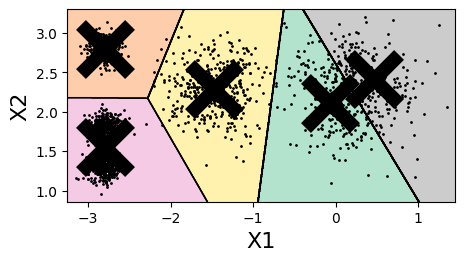

In [84]:
plt.figure(figsize=(5, 2.5))
plot_decision_boundaries(kmeans, X)
plt.show()

#### Hard clustering vs Soft clustering

In [85]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1], dtype=int32)

In [86]:
np.around(kmeans.transform(X_new), decimals=2)

array([[0.12, 2.9 , 2.84, 1.5 , 0.63],
       [3.07, 5.85, 5.82, 4.48, 2.56],
       [3.07, 0.29, 1.46, 1.69, 3.52],
       [2.96, 0.36, 0.97, 1.54, 3.47]])

#### K-means algorithm

In [87]:
k = 5
kmeans_iter1 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="lloyd", max_iter=1, random_state=4)
kmeans_iter2 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="lloyd", max_iter=2, random_state=4)
kmeans_iter3 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="lloyd", max_iter=3, random_state=4)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=4)

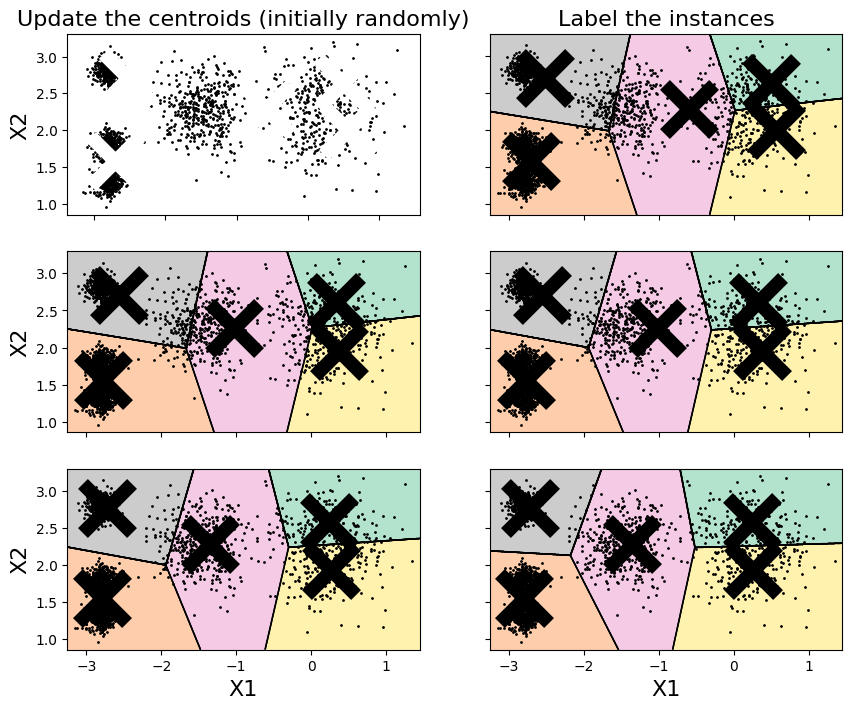

In [88]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("X2", fontsize=16)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=16)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=16)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [89]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=16)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=16)

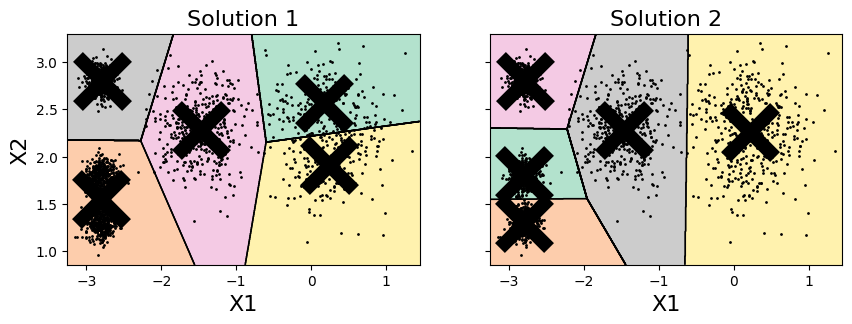

In [90]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="lloyd", random_state=4)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="lloyd", random_state=20)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X, "Solution 1", "Solution 2")
plt.show()

#### K-Means++

`init="k-means++"` by default. `n_init = 10` by default.

211.59853725816828


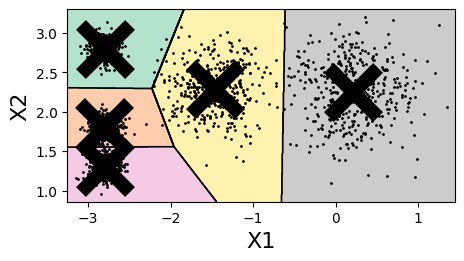

In [91]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
print(kmeans.inertia_)

plt.figure(figsize=(5, 2.5))
plot_decision_boundaries(kmeans, X)
plt.show()

#### Optimal k

Is k value the higher the better? Or the lower the better? How do we decide the k when we have unlabeled data fro clustering?

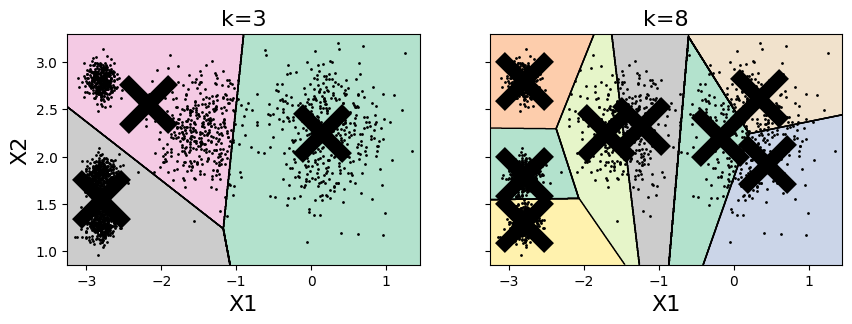

In [92]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans_k8 = KMeans(n_clusters=8, random_state=42, n_init="auto")

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "k=3", "k=8")
plt.show()

In [93]:
print(kmeans_k3.inertia_, kmeans_k8.inertia_)

653.2167190021554 127.13141880461835


##### Elbow method

Inertia when k=8 is much smaller than k=3 and k=5, does it man k=8 is better than k=5?

No, we cannot simply take the value of k that minimizes the inertia, since it keeps getting lower as we increase k. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of k and analyze the resulting curve:

In [94]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X) for k in range(2, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

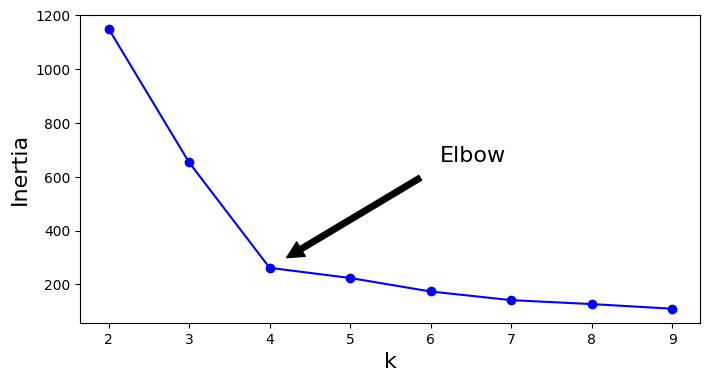

In [95]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), inertias, "bo-")
plt.xlabel("k", fontsize=16)
plt.ylabel("Inertia", fontsize=16)
plt.annotate('Elbow',
             xy=(4, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

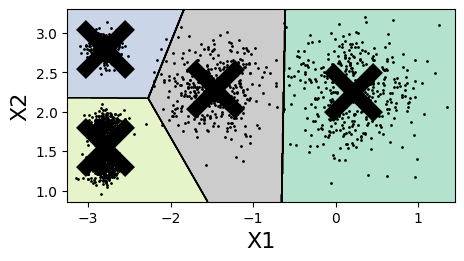

In [96]:
plt.figure(figsize=(5, 2.5))
plot_decision_boundaries(kmeans_per_k[2], X)# k=4
plt.show()

##### Sihouette score

In [97]:
from sklearn.metrics import silhouette_score

In [98]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

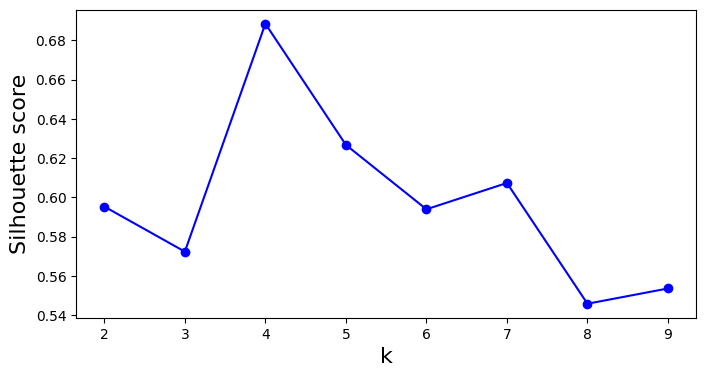

In [99]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=16)
plt.ylabel("Silhouette score", fontsize=16)
plt.show()

##### Silhouette diagram

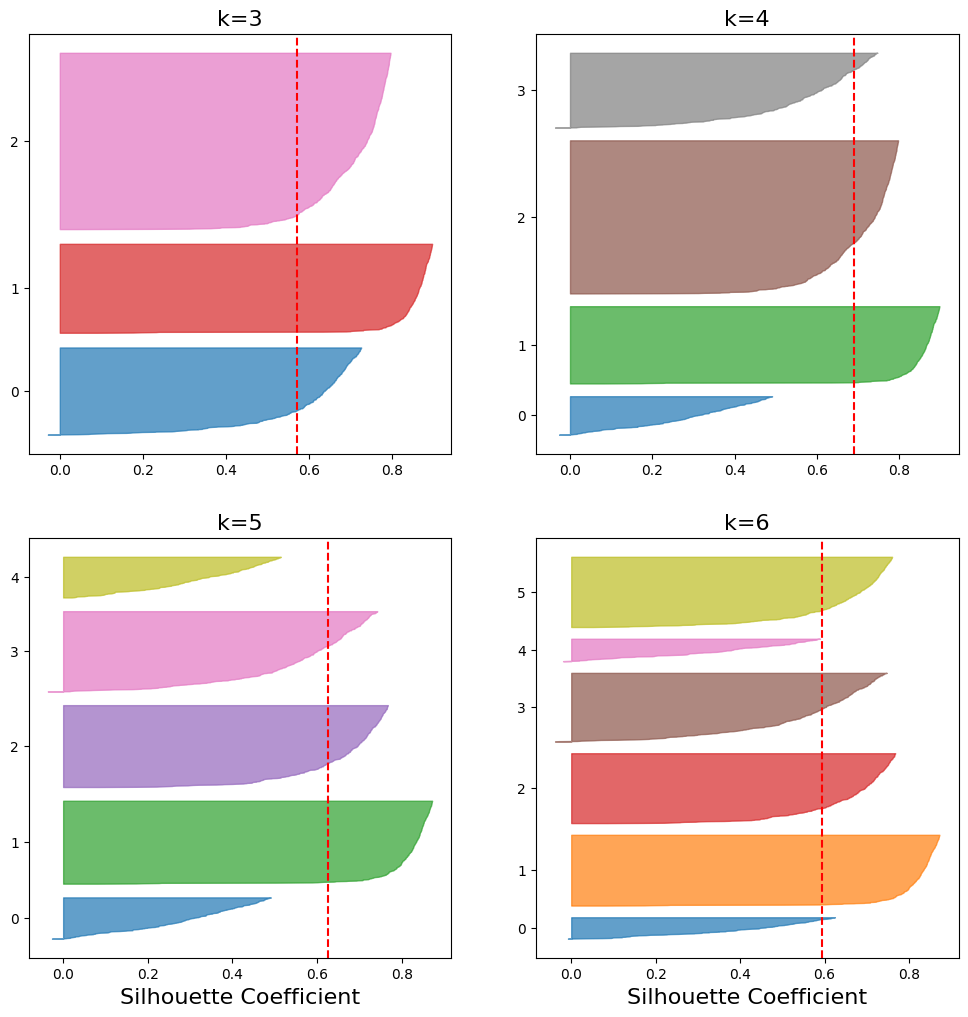

In [100]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(12, 12))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.tab10(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (5, 6):
        plt.xlabel("Silhouette Coefficient", fontsize=16)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("k={}".format(k), fontsize=16)

plt.show()

In [101]:
silhouette_scores

[np.float64(0.5953628624305034),
 np.float64(0.5723900247411775),
 np.float64(0.688531617595759),
 np.float64(0.6267891051050735),
 np.float64(0.5939826924531691),
 np.float64(0.6073764342983768),
 np.float64(0.5458573941676348),
 np.float64(0.553632752836704)]

#### mini-batch K-Means

In [102]:
from sklearn.cluster import MiniBatchKMeans
from timeit import timeit


In [103]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

In [104]:
filename = "my_mnist.mmap"
X_memmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_memmap[:] = X_train
X_memmap.flush()


In [105]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, n_init=3, random_state=42)
minibatch_kmeans.fit(X_memmap)


MiniBatchKMeans(batch_size=10, n_clusters=10, n_init=3, random_state=42)

100/100

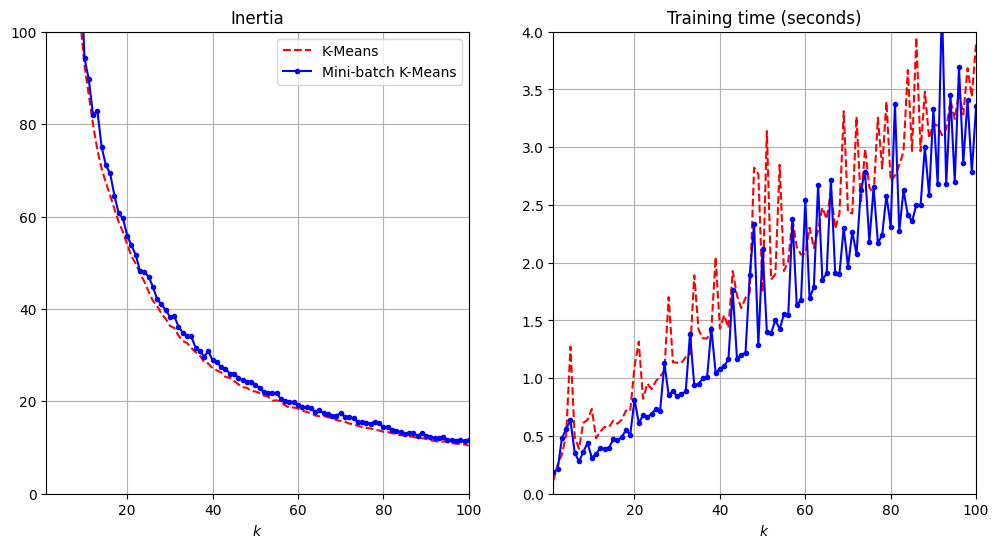

In [106]:
max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, 0, 100])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Training time (seconds)")
plt.axis([1, max_k, 0, 4])
plt.grid()

plt.show()

#### Limitations of K-Means

In [107]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [108]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

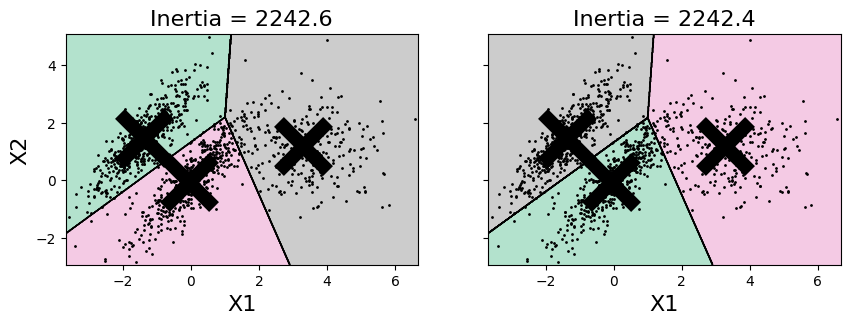

In [109]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=16)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=16)

plt.show()

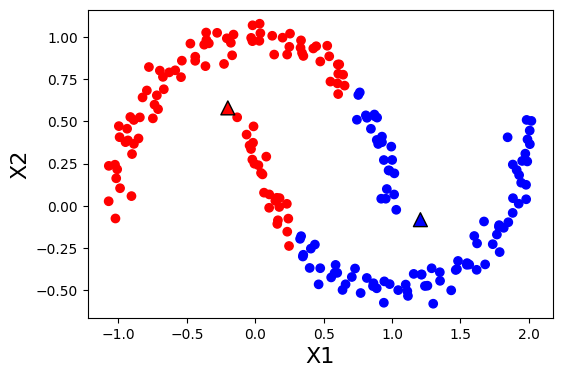

In [110]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2, n_init="auto")
y_pred = kmeans.fit_predict(X)

plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.bwr)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=[plt.cm.bwr(0), plt.cm.bwr(255)],
            marker='^', s=100, edgecolor='k')
plt.xlabel("X1", fontsize = 16)
plt.ylabel("X2", fontsize = 16)
plt.show()